<a href="https://cognitiveclass.ai"><img src = "https://ibm.box.com/shared/static/9gegpsmnsoo25ikkbl4qzlvlyjbgxs5x.png" width = 400> </a>

<h1 align=center><font size = 5> Coursera C09 W04 and W05 - Creative Use of FourSquare</font></h1>

<h1 align=center><font size = 5> Coursera C09 W04 and W05 - Residential Real Estate Analysis - São Paulo City - Brazil</font></h1>

## Introduction

This Lab Session is part of the **Coursera-IBM course "Applied Data Science Capstone"** and it is the task for Weeks 04 and 05 .\
Students are asked to devise a Business issue and to propose a creative solution to it by applying tools and knowledge acquired thorought the course. Foursquare API usage is a must. 

This Notebook will analyse a particular **Residential Real Estate issue in the city of São Paulo (Brazil)** from different but not conflicting standpoints and will design a DS-AI Model capable of providing orientation for both estate selling and estate acquiring in São Paulo by concatening demand (needs, preferences) with supply (facilities, utilities and services).

## Some Lines about the City of São Paulo (Sampa):

São Paulo is a big city and it is indeed the most populated brazilian city. It is a Metropole that 15 million people call their "home". Add to this already impressive number another huge figure of commuters from satellite cities (another million) and you will have a impressive Residential Real Estate market on your hands. People who live in São Paulo will either leave parent´s house or will move from their current address to a new, better one. Commuters want to move to São Paulo so that they can finally quit wasting 3 hours on a daily basis on traffic or on trains or on buses.
All of them have different needs and different perspectives when it comes to acquire a place to live, be it a "regular" apartment, be it a "studio" apartment or be it a house.

Their choices depend on several factors. Some of the most obvious and more relenvat are listed below:\
a) Professional career moment combined with age (newly-graduated, seasoned professional or retired);\
b) Family structure (single, newly-married, married without children, married with children or divorced);\
c) Purchasing Power (low income, high income, combined income);\
d) Resale value, which also depends on items 'a' and 'b' because people´s lives changes;\
e) And, **the driver for this analysis**, what are the facilities, utilities and services in the neighbourhood of their place of choice. What does the neighbourhood offer to make their life less unbearable (supermarkets, gym, subway or bus transportation, schools, shopping malls, etc) ??

In other words, a diverse set of needs and values is just around he corner and it is subject to change as time passes by. What is important for someone might be utterly irrelevant to others and also to himself in the future. But the idea of giving **Value** to every feature of a place to live is always there and it can be of *subjectivity nature*, albeit any market research will trace common trends like borough reputation, closeness to good schools and to functional public transportation .

Another interesting aspect of this study lies on its **double utility** => what might play an essential role for a prospective buyer to acquire his-her "home, sweet home" might also be a powerful resource for a good Real Estate salesperson if he-she reads the customer aspirations accurately and have both data and portfolio to make ends meet. Demand and Supply.

## Methodology and Target Groups:

In a city as big and diverse as São Paulo, it comes not as a surprise that people display a broad palette of preferences. The same thing can be said about real estate offerings. However, in order to keep this task´s dimensions compatible to the purpose of concepts learning and experimentation, I will restrain it to 2 main types of real estate. 

By the way, this is not "a jump in the dark" at al. Quite recently I was interested in acquiring an Studio for investiment purposes and spent a couple of months talking to more than 50 salesperson in their showrooms. From these conversations, I got valuable insights of what the market offers nowadays and what prospective buyers want. 

I was also told that nowadays the market displays two major offerings for those who want to acquire an apartment:\
**1) Studio:** It really looks like a hotel room with some added accessories. The area ranges from 25 to 33 square meters.\
**2) Regular:** It is the "regular" apartment everybody is used to => 2, 3 or 4 bedrooms (sometimes with exclusive bathrooms), living room, kitchen, dining room, etc. The area ranges from 50 to 180 square meter. 

In a city that never ceases to grow, growth means going upwards, means tall buildings and skyscrappers. Supply and Demand for houses are proportionaly low because of security issues. Urban violence scares every São Paulo inhabitant who is led to make the option for apartments rather than houses. In the last decades, the market for houses in private and exclusive condos has been booming and it deserves an study by itsel, but for the present, we will restrain ourselves to apartments. 

Potential Real Estate buyers can also be dwarfed to three categories:\
**1) Studio Buyer:** He-she is usually a single young person starting a career and who has different values from his-her parents. A car is undesirable and Uber or Public Transportation are prefered. Technology-addicted with a taste for cosmopolitan cuisines.\
**2) Regular Buyer:** For this case, being married is the most common marital status and the couple wants a place to live for several years and start a family. They are people that could once have been Studio buyers but also people from neighbor towns that want spend less time commuting. Car (or cars) is a statement of social position as a good Health plan.\
**3) Investor Buyer:** This buyer is the most senior of all. It is common in Brazil people who retire but still need to have income. Some of these people acquire apartments (and houses) to rent. They might acquire any type of Real State, Studios os Regulars, in any combination they think will maximize their income.

A little bit into the Model.

**Professionals targeted:**\
Taking into account everything that was briefly explained above, the underlying idea for this Notebook lies on providing **Potential Buyers and Real Estate Professionals** an index-based tool to help them identifying their targets and making the best of business opportunities.

**Methodology:** \
a) Selection of 25 São Paulo boroughs which are known for decades as the best locations in the city for real estate investment;\
b) Extraction by FourSquare API of all interesting venues around each of these boroughs;\
c) Further Classification of borough venues, which means concatenation of similar ones into a wider one (Bar and Pub turn into Bar);\
d) Development of "Buyer-Drivers-and-Preferences" dataframe which will lock to the Classification labels built on item c);\
e) **"Attractiveness Index"** calculation which will be the multiplication of the number(frequency) of venue occurence by the "power of attraction" it displays for each type of buyer;\
f) Index-based Decision.

</p> A note about "Attractiveness Index" calculation. It is quite simple indeed: A Studio buyer prioritizes Public Transportation, therefore any proximity to Subway stations will be way more important to him-her than any Auto-Retail or Auto-Services facilities around their future "home, sweet home". For Regular buyers it is exactly the opposite and Investor buyers will be some sort of average between the two former types.

**Step 01:**\
Libraries Import

In [1]:
import pandas as pd

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print()
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0-pyh9f0ad1d_0



geopy-2.0.0          | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: d

In [2]:
# pip install lxml

**Step 02:**\
São Paulo Buroughs Data Import

In [55]:
subdivisions = pd.read_excel("sao_paulo_boroughs.xlsx")

In [56]:
subdivisions

,Borough,Latitude,Longitude,City_Sector
0,Bela Vista,-23.549112,-46.652273,Downtown
1,Higienopolis,-23.543747,-46.656409,Downtown
2,Mooca,-23.564321,-46.596572,Downtown
3,Santa Cecilia,-23.534434,-46.655584,Downtown
4,Analia Franco,-23.561479,-46.563194,East
5,Tatuape,-23.545035,-46.573325,East
6,Santana,-23.502883,-46.624897,North
7,Brooklyn,-23.626459,-46.687502,South
8,Campo Belo,-23.622684,-46.671107,South
9,Ipiranga,-23.588708,-46.610538,South


**Step 03:**\
FourSquare API Credentials and Extraction of Venues Data

In [57]:
CLIENT_ID = '113ZWQSUYLUGMKP51IRZVZRVDHJBACXCYTXIXGD5GM5PVO5B' # your Foursquare ID
CLIENT_SECRET = '5QXPGLDYT1SVGN3FVVLMZEV0EKJMYPMJNMJAMF2X3ZZEW0SP' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 350 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 113ZWQSUYLUGMKP51IRZVZRVDHJBACXCYTXIXGD5GM5PVO5B
CLIENT_SECRET:5QXPGLDYT1SVGN3FVVLMZEV0EKJMYPMJNMJAMF2X3ZZEW0SP


In [58]:
# From Google, São Paulo city geographical coordinates are (downtown):
sampa_lat = -23.5474
sampa_lng = -46.63611

In [59]:
# Final parameters to FourSquare usage. No restriction to any venue type
radius = 5000
place = ''

In [60]:
# define the dataframe columns
column_names = ['Borough','Venue_Name', 'Business_Category','Venue_Latitude', 'Venue_Longitude', 'Decision'] 

# instantiate the dataframe
sp_df = pd.DataFrame(columns=column_names)

In [61]:
sp_df

,Borough,Venue_Name,Business_Category,Venue_Latitude,Venue_Longitude,Decision


In [62]:
# This module turns 'request' output into a pandas df, so that we can work with data and get insights
# Key concept here lies on understading the nature of how every piece of information, that is, whether part of a list or a dictionary
# and how to correctly extract them in order to build a functional dataframe.

for i in range(len(subdivisions['Borough'])):
    sp_lat = subdivisions['Latitude'][i]
    sp_lng = subdivisions['Longitude'][i]
    print("The name of the burough is {} with coordinates => Latitude {} and Longitude {}"
          .format(subdivisions['Borough'][i], subdivisions['Latitude'][i], subdivisions['Longitude'][i]))
    radius = 4000
    place = ''
    
    url_sp = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}&query={}'.format(CLIENT_ID, CLIENT_SECRET, sp_lat, sp_lng, VERSION, radius, LIMIT,place)
    
    results_sp = requests.get(url_sp).json()
    
    sp_data = results_sp['response']['venues']
        
    for count in sp_data: 
#     print(count)
        Name = count['name'] 
    
        if len(count['categories']) == 0:
            BizzCat = 'NaN'
        else:
            temp = list(count['categories'][0].values())   # from dict 'categories', extract the values, turn them into a list to pick pos '0'
            BizzCat = temp[1]
    
        tmp = count['location']
        chv = list(tmp.keys())
#     print('chv zero is', chv[0], 'for name =>', Name)    
    
        if chv[0] == 'address':
            if chv[1] == 'crossStreet':
                sp_latlng = list(tmp.values())
                Latitude = sp_latlng[2]
                Longitude = sp_latlng[3]
            else:
                sp_latlng = list(tmp.values())
                Latitude = sp_latlng[1]
                Longitude = sp_latlng[2]
        else:
            if chv[0] == 'crossStreet':
                sp_latlng = list(tmp.values())
                Latitude = sp_latlng[1]
                Longitude = sp_latlng[2]
            else:
                sp_latlng = list(tmp.values())
                Latitude = sp_latlng[0]
                Longitude = sp_latlng[1]
        
#     print('=>')
        borough = subdivisions['Borough'][i]
      
        sp_df = sp_df.append({'Borough':borough, 'Venue_Name': Name, 'Business_Category':BizzCat, 'Venue_Latitude': Latitude, 'Venue_Longitude': Longitude}, ignore_index=True)

The name of the burough is Bela Vista with coordinates => Latitude -23.549112 and Longitude -46.652273
The name of the burough is Higienopolis with coordinates => Latitude -23.543747 and Longitude -46.656409
The name of the burough is Mooca with coordinates => Latitude -23.564321 and Longitude -46.596572
The name of the burough is Santa Cecilia with coordinates => Latitude -23.5344342 and Longitude -46.655584
The name of the burough is Analia Franco with coordinates => Latitude -23.561479 and Longitude -46.563194
The name of the burough is Tatuape with coordinates => Latitude -23.545035 and Longitude -46.573325
The name of the burough is Santana with coordinates => Latitude -23.502883 and Longitude -46.624897
The name of the burough is Brooklyn with coordinates => Latitude -23.626459 and Longitude -46.687502
The name of the burough is Campo Belo with coordinates => Latitude -23.622684 and Longitude -46.671107
The name of the burough is Ipiranga with coordinates => Latitude -23.588708 a

**Step 04:**\
Data Cleansing:\
a) Column 'Decison' will help eliminate redundant or unimportant Business Categories (Yes=Remain - No=Discard);\
b) Unfortunately, data in Brazil are rare and very poor and some Venue Names do not have any Business Category description. Therefore, there will be row deletion for "NaN' content, but a calculation will be performed to ensure the loss of data is not significant;\
c) 'Business Category' concatenation => in order to keep this task within a reasonable computational size, labels will be merged accordingly to their similarities (Hospitals and Medical Centers will be together under 'Medical Services' entry, for example;\

In [63]:
sp_df.head()

,Borough,Venue_Name,Business_Category,Venue_Latitude,Venue_Longitude,Decision
0,Bela Vista,Estação Higienópolis - Mackenzie (Metrô),Metro Station,-23.548846,-46.652371,NaN
1,Bela Vista,Palácio Paralelo,Candy Store,-23.549162,-46.652235,NaN
2,Bela Vista,Juzanseverini's,Assisted Living,-23.549173,-46.652009,NaN
3,Bela Vista,Boulevard Padaria,Bakery,-23.547001,-46.653696,NaN
4,Bela Vista,Santa Gula,Restaurant,-23.547085,-46.649708,NaN


In [64]:
before = sp_df.shape
before

(2912, 6)

In [65]:
# lack of Business_Category data elimination step
sp_df = sp_df[sp_df.Business_Category != 'NaN'].reset_index()
sp_df = sp_df.drop('index', axis=1)
sp_df.head()

,Borough,Venue_Name,Business_Category,Venue_Latitude,Venue_Longitude,Decision
0,Bela Vista,Estação Higienópolis - Mackenzie (Metrô),Metro Station,-23.548846,-46.652371,NaN
1,Bela Vista,Palácio Paralelo,Candy Store,-23.549162,-46.652235,NaN
2,Bela Vista,Juzanseverini's,Assisted Living,-23.549173,-46.652009,NaN
3,Bela Vista,Boulevard Padaria,Bakery,-23.547001,-46.653696,NaN
4,Bela Vista,Santa Gula,Restaurant,-23.547085,-46.649708,NaN


In [66]:
after = sp_df.shape
after

(2857, 6)

In [67]:
dataLoss = (((before[0]-after[0])/before[0]))*100

In [68]:
print("Loss of data is", before[0]-after[0], "rows or %.3f" % dataLoss, "%.")

Loss of data is 55 rows or 1.889 %.


**Important Segment:** Label Merging

In [69]:
for j in range(sp_df.shape[0]):
    if sp_df['Business_Category'][j] == 'Office' or sp_df['Business_Category'][j] == 'Building' or sp_df['Business_Category'][j] == 'Business Center' or sp_df['Business_Category'][j] == 'Tech Startup':
        sp_df['Business_Category'][j] = 'Office'
        sp_df['Decision'][j] = 'Yes'
    elif sp_df['Business_Category'][j] == 'Gym' or sp_df['Business_Category'][j] == 'Gym / Fitness Center' or sp_df['Business_Category'][j] == 'Athletics & Sports' or sp_df['Business_Category'][j] == 'Gymnastics Gym':
        sp_df['Business_Category'][j] = 'Gym'
        sp_df['Decision'][j] = 'Yes'
    elif sp_df['Business_Category'][j] == 'Coffee Shop' or sp_df['Business_Category'][j] == 'Café' or sp_df['Business_Category'][j] == 'Cafeteria' or sp_df['Business_Category'][j] == 'Tea Room' or sp_df['Business_Category'][j] == 'Breakfast Spot':
        sp_df['Business_Category'][j] = 'Coffee Shop'
        sp_df['Decision'][j] = 'Yes'
    elif sp_df['Business_Category'][j] == 'Coworking Space' or sp_df['Business_Category'][j] == 'Meeting Room' or sp_df['Business_Category'][j] == 'Conference Room' or sp_df['Business_Category'][j] == 'Event Space':
        sp_df['Business_Category'][j] = 'Coworking Space'
        sp_df['Decision'][j] = 'Yes'
    elif sp_df['Business_Category'][j] == 'Church' or sp_df['Business_Category'][j] == 'Temple' or sp_df['Business_Category'][j] == 'Spiritual Center':
        sp_df['Business_Category'][j] = 'Church & Temple'
        sp_df['Decision'][j] = 'Yes'
    elif sp_df['Business_Category'][j] == 'Bus Stop' or sp_df['Business_Category'][j] == 'Bus Station':
        sp_df['Business_Category'][j] = 'Bus Stop'
        sp_df['Decision'][j] = 'Yes'
    elif sp_df['Business_Category'][j] == 'Medical Center' or sp_df['Business_Category'][j] == 'Medical Lab' or sp_df['Business_Category'][j] == 'Hospital':
        sp_df['Business_Category'][j] = 'Medical Services (Hospitals & Laboratories)'
        sp_df['Decision'][j] = 'Yes'
    elif sp_df['Business_Category'][j] == 'Automotive Shop' or sp_df['Business_Category'][j] == 'Auto Garage' or sp_df['Business_Category'][j] == 'Auto Dealership' or sp_df['Business_Category'][j] == 'Car Wash' or sp_df['Business_Category'][j] == 'Auto Workshop':
        sp_df['Business_Category'][j] = 'Automotive Services (Sales & Maintenance)'
        sp_df['Decision'][j] = 'Yes'
    elif sp_df['Business_Category'][j] == 'Supermarket' or sp_df['Business_Category'][j] == 'Market' or sp_df['Business_Category'][j] == 'Grocery Store' or sp_df['Business_Category'][j] == 'Butcher':
        sp_df['Business_Category'][j] = 'Supermarket'
        sp_df['Decision'][j] = 'Yes'
    elif sp_df['Business_Category'][j] == 'Restaurant' or sp_df['Business_Category'][j] == 'Brazilian Restaurant' or sp_df['Business_Category'][j] == 'Italian Restaurant' or sp_df['Business_Category'][j] == 'Asian Restaurant' or sp_df['Business_Category'][j] == 'Diner' or sp_df['Business_Category'][j] == 'Pizza Place' or sp_df['Business_Category'][j] == 'Chinese Restaurant' or sp_df['Business_Category'][j] == 'Japanese Restaurant' or sp_df['Business_Category'][j] == 'Sushi Restaurant' or sp_df['Business_Category'][j] == 'Middle Eastern Restaurant':
        sp_df['Business_Category'][j] = 'Restaurant'
        sp_df['Decision'][j] = 'Yes'
    elif sp_df['Business_Category'][j] == 'Snack Place' or sp_df['Business_Category'][j] == 'Food Truck' or sp_df['Business_Category'][j] == 'Candy Store' or sp_df['Business_Category'][j] == 'Pastelaria' or sp_df['Business_Category'][j] == 'Food Stand' or sp_df['Business_Category'][j] == 'Burger Joint' or sp_df['Business_Category'][j] == 'Hot Dog Joint':
        sp_df['Business_Category'][j] = 'Snack Place'
        sp_df['Decision'][j] = 'Yes'
    elif sp_df['Business_Category'][j] == 'Health & Beauty Service' or sp_df['Business_Category'][j] == 'Nail Salon' or sp_df['Business_Category'][j] == 'Spa' or sp_df['Business_Category'][j] == 'Boutique' or sp_df['Business_Category'][j] == 'Cosmetics Shop':
        sp_df['Business_Category'][j] = 'Women´s Personnal Care'
        sp_df['Decision'][j] = 'Yes'
    elif sp_df['Business_Category'][j] == 'Electronics Store' or sp_df['Business_Category'][j] == 'Mobile Phone Shop' or sp_df['Business_Category'][j] == 'IT Services':
        sp_df['Business_Category'][j] = 'Electronics & Mobile'
        sp_df['Decision'][j] = 'Yes'
    elif sp_df['Business_Category'][j] == 'High School' or sp_df['Business_Category'][j] == 'College Lab' or sp_df['Business_Category'][j] == 'University' or sp_df['Business_Category'][j] == 'Student Center' or sp_df['Business_Category'][j] == 'College Auditorium' or sp_df['Business_Category'][j] == 'General College & University' or sp_df['Business_Category'][j] == 'School' or sp_df['Business_Category'][j] == 'Language School':
        sp_df['Business_Category'][j] = 'Educational Services'
        sp_df['Decision'][j] = 'Yes'
    elif sp_df['Business_Category'][j] == 'Bar' or sp_df['Business_Category'][j] == 'Pub' or sp_df['Business_Category'][j] == 'Internet Café':
        sp_df['Business_Category'][j] = 'Bar'
        sp_df['Decision'][j] = 'Yes'
    elif sp_df['Business_Category'][j] == 'Salon / Barbershop' or sp_df['Business_Category'][j] == 'Men´s Store' or sp_df['Business_Category'][j] == 'Sporting Goods Shop':
        sp_df['Business_Category'][j] = 'Men´s Personnal Care'
        sp_df['Decision'][j] = 'Yes'
    elif sp_df['Business_Category'][j] == 'Shoe Store' or sp_df['Business_Category'][j] == 'Shoe Repair' or sp_df['Business_Category'][j] == 'Department Store' or sp_df['Business_Category'][j] == 'Clothing Store' or sp_df['Business_Category'][j] == 'Miscellaneous Shop':
        sp_df['Business_Category'][j] = 'Clothing & Shoes'
        sp_df['Decision'][j] = 'Yes'
    elif sp_df['Business_Category'][j] == 'Residential Building (Apartment / Condo)':
        sp_df['Decision'][j] = 'Yes'
    elif sp_df['Business_Category'][j] == "Doctor's Office":
        sp_df['Decision'][j] = 'Yes'
    elif sp_df['Business_Category'][j] == "Dentist's Office":
        sp_df['Decision'][j] = 'Yes'
    elif sp_df['Business_Category'][j] == 'Bank':
        sp_df['Decision'][j] = 'Yes'
    elif sp_df['Business_Category'][j] == 'Bus Line':
        sp_df['Decision'][j] = 'Yes'
    elif sp_df['Business_Category'][j] == 'Pharmacy':
        sp_df['Decision'][j] = 'Yes'
    elif sp_df['Business_Category'][j] == 'Gas Station':
        sp_df['Decision'][j] = 'Yes'
    elif sp_df['Business_Category'][j] == 'Metro Station':
        sp_df['Decision'][j] = 'Yes'
    elif sp_df['Business_Category'][j] == 'Train Station':
        sp_df['Decision'][j] = 'Yes'
    elif sp_df['Business_Category'][j] == 'Laundry Service':
        sp_df['Decision'][j] = 'Yes'
    else:
        sp_df['Decision'][j] = 'No'

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

In [70]:
# at the column 'Decision' some 'No' can be spotted
sp_df.head(8)

,Borough,Venue_Name,Business_Category,Venue_Latitude,Venue_Longitude,Decision
0,Bela Vista,Estação Higienópolis - Mackenzie (Metrô),Metro Station,-23.548846,-46.652371,Yes
1,Bela Vista,Palácio Paralelo,Snack Place,-23.549162,-46.652235,Yes
2,Bela Vista,Juzanseverini's,Assisted Living,-23.549173,-46.652009,No
3,Bela Vista,Boulevard Padaria,Bakery,-23.547001,-46.653696,No
4,Bela Vista,Santa Gula,Restaurant,-23.547085,-46.649708,Yes
5,Bela Vista,Edifício Consolata,Residential Building (Apartment / Condo),-23.549069,-46.652204,Yes
6,Bela Vista,Estação Luz (CPTM),Train Station,-23.536232,-46.634527,Yes
7,Bela Vista,Disco Sete,Record Shop,-23.548893,-46.652131,No


In [71]:
# rows with 'No' labels at decision column elimination step
sp_df = sp_df[sp_df.Decision != 'No'].reset_index()
sp_df = sp_df.drop('index', axis=1)
sp_df.head(8)

,Borough,Venue_Name,Business_Category,Venue_Latitude,Venue_Longitude,Decision
0,Bela Vista,Estação Higienópolis - Mackenzie (Metrô),Metro Station,-23.548846,-46.652371,Yes
1,Bela Vista,Palácio Paralelo,Snack Place,-23.549162,-46.652235,Yes
2,Bela Vista,Santa Gula,Restaurant,-23.547085,-46.649708,Yes
3,Bela Vista,Edifício Consolata,Residential Building (Apartment / Condo),-23.549069,-46.652204,Yes
4,Bela Vista,Estação Luz (CPTM),Train Station,-23.536232,-46.634527,Yes
5,Bela Vista,Ministério das Relações Exteriores,Office,-23.549116,-46.652432,Yes
6,Bela Vista,Volanty,Automotive Services (Sales & Maintenance),-23.548967,-46.651949,Yes
7,Bela Vista,Charme De Higienopolis,Restaurant,-23.549001,-46.651970,Yes


In [72]:
# drops columns no longer useful
new_sp_df = sp_df.drop('Decision', 1)
new_sp_df.head()

,Borough,Venue_Name,Business_Category,Venue_Latitude,Venue_Longitude
0,Bela Vista,Estação Higienópolis - Mackenzie (Metrô),Metro Station,-23.548846,-46.652371
1,Bela Vista,Palácio Paralelo,Snack Place,-23.549162,-46.652235
2,Bela Vista,Santa Gula,Restaurant,-23.547085,-46.649708
3,Bela Vista,Edifício Consolata,Residential Building (Apartment / Condo),-23.549069,-46.652204
4,Bela Vista,Estação Luz (CPTM),Train Station,-23.536232,-46.634527


**Step 05:**\
Frequency of Venue Type Occurence Calculation

In [73]:
sampa_onehot = pd.get_dummies(new_sp_df[['Business_Category']], prefix="", prefix_sep="")
sampa_onehot['Borough'] = new_sp_df['Borough'] 

fixed_columns = [sampa_onehot.columns[-1]] + list(sampa_onehot.columns[:-1]) #establishes column sequence(order)
sampa_onehot = sampa_onehot[fixed_columns]

sampa_grouped = sampa_onehot.groupby('Borough').mean().reset_index()

sampa_grouped.head(25)

,Borough,Automotive Services (Sales & Maintenance),Bank,Bar,Bus Line,Bus Stop,Church & Temple,Clothing & Shoes,Coffee Shop,Coworking Space,Dentist's Office,Doctor's Office,Educational Services,Electronics & Mobile,Gas Station,Gym,Laundry Service,Medical Services (Hospitals & Laboratories),Men´s Personnal Care,Metro Station,Office,Pharmacy,Residential Building (Apartment / Condo),Restaurant,Snack Place,Supermarket,Train Station,Women´s Personnal Care
0,Analia Franco,0.028571,0.071429,0.000000,0.014286,0.014286,0.014286,0.242857,0.042857,0.000000,0.014286,0.028571,0.100000,0.057143,0.000000,0.028571,0.000000,0.071429,0.057143,0.000000,0.028571,0.000000,0.028571,0.000000,0.028571,0.014286,0.000000,0.114286
1,Barra Funda,0.027778,0.055556,0.013889,0.055556,0.013889,0.000000,0.013889,0.027778,0.083333,0.000000,0.013889,0.000000,0.027778,0.013889,0.000000,0.000000,0.013889,0.041667,0.000000,0.472222,0.000000,0.013889,0.083333,0.027778,0.000000,0.000000,0.000000
2,Bela Vista,0.076923,0.000000,0.076923,0.000000,0.000000,0.000000,0.019231,0.019231,0.019231,0.019231,0.038462,0.076923,0.000000,0.000000,0.019231,0.019231,0.038462,0.038462,0.019231,0.153846,0.000000,0.173077,0.115385,0.057692,0.000000,0.019231,0.000000
3,Brooklyn,0.023256,0.034884,0.011628,0.023256,0.081395,0.000000,0.011628,0.011628,0.034884,0.011628,0.023256,0.011628,0.000000,0.023256,0.023256,0.000000,0.011628,0.058140,0.011628,0.441860,0.011628,0.058140,0.023256,0.023256,0.011628,0.000000,0.023256
4,Butanta,0.034884,0.069767,0.011628,0.151163,0.104651,0.000000,0.011628,0.081395,0.011628,0.046512,0.023256,0.011628,0.023256,0.000000,0.000000,0.000000,0.046512,0.011628,0.023256,0.104651,0.046512,0.000000,0.046512,0.093023,0.011628,0.011628,0.023256
5,Campo Belo,0.051948,0.012987,0.025974,0.000000,0.000000,0.000000,0.038961,0.000000,0.025974,0.025974,0.103896,0.025974,0.012987,0.012987,0.038961,0.025974,0.012987,0.051948,0.000000,0.194805,0.025974,0.025974,0.155844,0.012987,0.025974,0.000000,0.090909
6,Cerqueira Cesar,0.000000,0.000000,0.000000,0.000000,0.012987,0.012987,0.142857,0.051948,0.051948,0.025974,0.038961,0.038961,0.012987,0.000000,0.025974,0.000000,0.000000,0.168831,0.000000,0.116883,0.012987,0.025974,0.077922,0.077922,0.000000,0.000000,0.103896
7,Higienopolis,0.000000,0.085106,0.021277,0.021277,0.042553,0.000000,0.042553,0.106383,0.021277,0.042553,0.063830,0.063830,0.000000,0.021277,0.000000,0.000000,0.000000,0.063830,0.000000,0.106383,0.021277,0.148936,0.063830,0.021277,0.000000,0.000000,0.042553
8,Ipiranga,0.169492,0.033898,0.033898,0.000000,0.000000,0.033898,0.000000,0.016949,0.067797,0.000000,0.000000,0.152542,0.000000,0.033898,0.016949,0.000000,0.033898,0.000000,0.000000,0.203390,0.000000,0.033898,0.050847,0.084746,0.000000,0.000000,0.033898
9,Lapa,0.047059,0.023529,0.000000,0.000000,0.011765,0.023529,0.035294,0.023529,0.035294,0.070588,0.058824,0.023529,0.023529,0.023529,0.058824,0.058824,0.035294,0.094118,0.000000,0.117647,0.023529,0.035294,0.035294,0.023529,0.011765,0.000000,0.105882


In [74]:
sampa_grouped.shape

(25, 28)

**Step 06:**\
Prospective Buyer´s Preference and Drivers Dataframe Import

In [75]:
weights = pd.read_excel("sp_attraction_values.xlsx")
weights.head()

,Buyer Type,Automotive Services (Sales & Maintenance),Bank,Bar,Bus Line,Bus Stop,Church & Temple,Clothing & Shoes,Coffee Shop,Coworking Space,Dentist's Office,Doctor's Office,Educational Services,Electronics & Mobile,Gas Station,Gym,Laundry Service,Medical Services (Hospitals & Laboratories),Men´s Personnal Care,Metro Station,Office,Pharmacy,Residential Building (Apartment / Condo),Restaurant,Snack Place,Supermarket,Train Station,Women´s Personnal Care
0,Studio Buyer,0.00,0.00,0.02,0.05,0.05,0.02,0.040,0.05,0.05,0.02,0.02,0.05,0.05,0.00,0.05,0.05,0.05,0.02,0.10,0.10,0.02,0.00,0.05,0.02,0.05,0.05,0.02
1,Regular Buyer,0.10,0.04,0.00,0.00,0.00,0.08,0.007,0.03,0.03,0.03,0.04,0.02,0.06,0.10,0.00,0.01,0.10,0.02,0.00,0.08,0.07,0.01,0.06,0.02,0.07,0.00,0.02
2,Investor Buyer,0.03,0.01,0.01,0.04,0.04,0.05,0.020,0.03,0.04,0.04,0.03,0.05,0.05,0.03,0.03,0.03,0.06,0.02,0.07,0.09,0.04,0.03,0.05,0.02,0.04,0.03,0.02


In [76]:
weights.shape[0]

3

**Step 07:**\
Final Dataframe Definition **(Attractiveness Indexes)** and Software-Oriented Decision

In [77]:
# define the dataframe columns
column_names = ['Borough','Attraction_Value_Studio', 'Attraction_Value_Regular','Attraction_Value_Investor', 'Classification'] 

# instantiate the dataframe
sp_attract_df = pd.DataFrame(columns=column_names)

In [78]:
sp_attract_df.head()

,Borough,Attraction_Value_Studio,Attraction_Value_Regular,Attraction_Value_Investor,Classification


In [79]:
# in order to multiply both dataframes element-wise, their first columns must be eliminated
final_sp = sampa_grouped.drop('Borough', 1)
final_buyer = weights.drop('Buyer Type', 1)

In [90]:
for i in range(sampa_grouped.shape[0]):
    j = 0
    sp_attract_df['Borough'] = sampa_grouped['Borough']
    sp_attract_df['Attraction_Value_Studio'][i] = sum(final_sp.iloc[i] * final_buyer.iloc[j])*1000 # to display a better looking at data
    sp_attract_df['Attraction_Value_Regular'][i] = sum(final_sp.iloc[i] * final_buyer.iloc[j+1])*1000
    sp_attract_df['Attraction_Value_Investor'][i] = sum(final_sp.iloc[i] * final_buyer.iloc[j+2])*1000
    
    if sp_attract_df['Attraction_Value_Studio'][i] > sp_attract_df['Attraction_Value_Regular'][i]:
        if sp_attract_df['Attraction_Value_Studio'][i] > sp_attract_df['Attraction_Value_Investor'][i]:
            sp_attract_df['Classification'][i] = 1
        else:
            sp_attract_df['Classification'][i] = 3
    else:
        if sp_attract_df['Attraction_Value_Regular'][i] > sp_attract_df['Attraction_Value_Investor'][i]:
            sp_attract_df['Classification'][i] = 2
        else:
            sp_attract_df['Classification'][i] = 3
sp_attract_df

,Borough,Attraction_Value_Studio,Attraction_Value_Regular,Attraction_Value_Investor,Classification
0,Analia Franco,34.8571,31.5571,32,1
1,Barra Funda,65,57.7361,60.2778,1
2,Bela Vista,39.0385,39.5577,42.6923,3
3,Brooklyn,60.6977,51.2442,57.6744,1
4,Butanta,43.3721,35.5465,40.9302,1
5,Campo Belo,44.026,47.8052,44.2857,2
6,Cerqueira Cesar,39.8701,31.2597,35.974,1
7,Higienopolis,33.8298,32.6383,36.5957,3
8,Ipiranga,41.0169,55.4237,46.1017,2
9,Lapa,37.0588,41.1882,38.7059,2


In [81]:
print()
print("FINAL RANKING FOR RESIDENTIAL REAL-ESTATE STUDY IN THE CITY OF SÃO PAULO - BRAZIL:")
print()
bestStudio = sp_attract_df.sort_values('Attraction_Value_Studio', ascending=False).reset_index(drop=True)
print("A) Top Five Boroughs for Studio Buyers")
print("The 1st best Borough in São Paulo for Studio buyers is {} with an Attractiveness Index of {}".format(bestStudio['Borough'][0], bestStudio['Attraction_Value_Studio'][0]))
print("The 2nd best Borough in São Paulo for Studio buyers is {} with an Attractiveness Index of {}".format(bestStudio['Borough'][1], bestStudio['Attraction_Value_Studio'][1]))
print("The 3rd best Borough in São Paulo for Studio buyers is {} with an Attractiveness Index of {}".format(bestStudio['Borough'][2], bestStudio['Attraction_Value_Studio'][2]))
print("The 4th best Borough in São Paulo for Studio buyers is {} with an Attractiveness Index of {}".format(bestStudio['Borough'][3], bestStudio['Attraction_Value_Studio'][3]))
print("The 5th best Borough in São Paulo for Studio buyers is {} with an Attractiveness Index of {}".format(bestStudio['Borough'][4], bestStudio['Attraction_Value_Studio'][4]))
print()
bestRegular = bestStudio.sort_values('Attraction_Value_Regular', ascending=False).reset_index(drop=True)
print("B) Top Five Boroughs for Regular Buyers")
print("The 1st best Borough in São Paulo for Regular buyers is {} with an Attractiveness Index of {}".format(bestRegular['Borough'][0], bestRegular['Attraction_Value_Regular'][0]))
print("The 2nd best Borough in São Paulo for Regular buyers is {} with an Attractiveness Index of {}".format(bestRegular['Borough'][1], bestRegular['Attraction_Value_Regular'][1]))
print("The 3rd best Borough in São Paulo for Regular buyers is {} with an Attractiveness Index of {}".format(bestRegular['Borough'][2], bestRegular['Attraction_Value_Regular'][2]))
print("The 4th best Borough in São Paulo for Regular buyers is {} with an Attractiveness Index of {}".format(bestRegular['Borough'][3], bestRegular['Attraction_Value_Regular'][3]))
print("The 5th best Borough in São Paulo for Regular buyers is {} with an Attractiveness Index of {}".format(bestRegular['Borough'][4], bestRegular['Attraction_Value_Regular'][3]))
print()
bestInvestor = bestRegular.sort_values('Attraction_Value_Investor', ascending=False).reset_index(drop=True)
print("C) Top Five Boroughs for Investor Buyers")
print("The 1st best Borough in São Paulo for Investor buyers is {} with an Attractiveness Index of {}".format(bestInvestor['Borough'][0], bestInvestor['Attraction_Value_Investor'][0]))
print("The 2nd best Borough in São Paulo for Investor buyers is {} with an Attractiveness Index of {}".format(bestInvestor['Borough'][1], bestInvestor['Attraction_Value_Investor'][1]))
print("The 3rd best Borough in São Paulo for Investor buyers is {} with an Attractiveness Index of {}".format(bestInvestor['Borough'][2], bestInvestor['Attraction_Value_Investor'][2]))
print("The 4th best Borough in São Paulo for Investor buyers is {} with an Attractiveness Index of {}".format(bestInvestor['Borough'][3], bestInvestor['Attraction_Value_Investor'][3]))
print("The 5th best Borough in São Paulo for Investor buyers is {} with an Attractiveness Index of {}".format(bestInvestor['Borough'][4], bestInvestor['Attraction_Value_Investor'][4]))
print()


FINAL RANKING FOR RESIDENTIAL REAL-ESTATE STUDY IN THE CITY OF SÃO PAULO - BRAZIL:

A) Top Five Boroughs for Studio Buyers
The 1st best Borough in São Paulo for Studio buyers is Vila Olimpia with an Attractiveness Index of 76.66666666666666
The 2nd best Borough in São Paulo for Studio buyers is Paulista with an Attractiveness Index of 74.06976744186046
The 3rd best Borough in São Paulo for Studio buyers is Barra Funda with an Attractiveness Index of 65.0
The 4th best Borough in São Paulo for Studio buyers is Brooklyn with an Attractiveness Index of 60.697674418604656
The 5th best Borough in São Paulo for Studio buyers is Paraíso with an Attractiveness Index of 52.5531914893617

B) Top Five Boroughs for Regular Buyers
The 1st best Borough in São Paulo for Regular buyers is Vila Olimpia with an Attractiveness Index of 60.397849462365585
The 2nd best Borough in São Paulo for Regular buyers is Santo Amaro with an Attractiveness Index of 58.11111111111111
The 3rd best Borough in São Paulo 

**Step 08:**\
Statistical Analysis:

In [82]:
studioAvgIdx = sp_attract_df['Attraction_Value_Studio'].mean()
regularAvgIdx = sp_attract_df['Attraction_Value_Regular'].mean()
investorAvgIdx = sp_attract_df['Attraction_Value_Investor'].mean()

studioStdIdx = sp_attract_df['Attraction_Value_Studio'].std()
regularStdIdx = sp_attract_df['Attraction_Value_Regular'].std()
investorStdIdx = sp_attract_df['Attraction_Value_Investor'].std()

print()
print("General Position and Dispersion Measures:")
print()
print("Average and Standard Deviation values of Attractiveness Index for Studio Buyers are: %.2f" % studioAvgIdx, " and %.2f"% studioStdIdx)
print("Average and Standard Deviation values of Attractiveness Index for Regular Buyers are: %.2f" % regularAvgIdx, " and %.2f"% regularStdIdx)
print("Average and Standard Deviation values of Attractiveness Index for Investor Buyers are: %.2f" % investorAvgIdx, " and %.2f"% investorStdIdx)
print()


General Position and Dispersion Measures:

Average and Standard Deviation values of Attractiveness Index for Studio Buyers are: 45.17  and 12.58
Average and Standard Deviation values of Attractiveness Index for Regular Buyers are: 44.14  and 9.52
Average and Standard Deviation values of Attractiveness Index for Investor Buyers are: 45.41  and 10.13



In [30]:
import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
fig = Figure()
canvas = FigureCanvas(fig)

<function matplotlib.pyplot.show(close=None, block=None)>

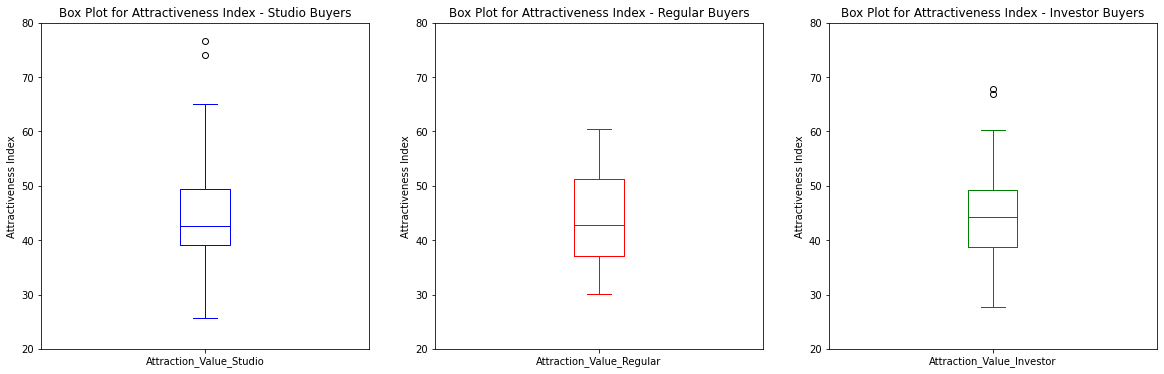

In [83]:
fig = plt.figure()

axSt = fig.add_subplot(1,3,1)
axRg = fig.add_subplot(1,3,2)
axIn = fig.add_subplot(1,3,3)

sp_attract_df['Attraction_Value_Studio'].plot(kind='box', color='blue', vert=True, figsize=(20,6), ax=axSt)
axSt.set_title('Box Plot for Attractiveness Index - Studio Buyers')
axSt.set_ylabel('Attractiveness Index')
axSt.set_ylim(20,80)

sp_attract_df['Attraction_Value_Regular'].plot(kind='box', color='red', vert=True, figsize=(20,6), ax=axRg)
axRg.set_title('Box Plot for Attractiveness Index - Regular Buyers')
axRg.set_ylabel('Attractiveness Index')
axRg.set_ylim(20,80)

sp_attract_df['Attraction_Value_Investor'].plot(kind='box', color='green', vert=True, figsize=(20,6), ax=axIn)
axIn.set_title('Box Plot for Attractiveness Index - Investor Buyers')
axIn.set_ylabel('Attractiveness Index')
axIn.set_ylim(20,80)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

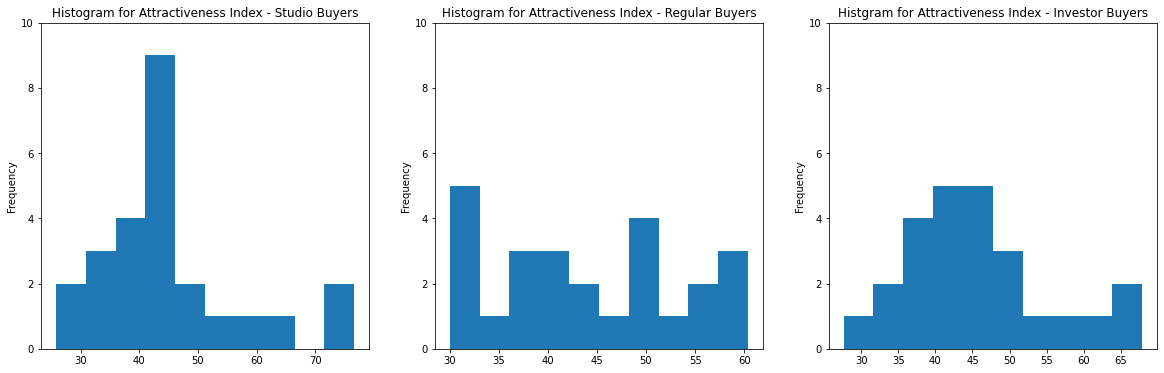

In [84]:
fig = plt.figure()

axStH = fig.add_subplot(1,3,1)
axRgH = fig.add_subplot(1,3,2)
axInH = fig.add_subplot(1,3,3)

sp_attract_df['Attraction_Value_Studio'].plot(kind='hist', figsize=(20,6), ax=axStH)
axStH.set_title('Histogram for Attractiveness Index - Studio Buyers')
axStH.set_ylim(0,10)

sp_attract_df['Attraction_Value_Regular'].plot(kind='hist', figsize=(20,6), ax=axRgH)
axRgH.set_title('Histogram for Attractiveness Index - Regular Buyers')
axRgH.set_ylim(0,10)

sp_attract_df['Attraction_Value_Investor'].plot(kind='hist', figsize=(20,6), ax=axInH)
axInH.set_title('Histgram for Attractiveness Index - Investor Buyers')
axInH.set_ylim(0,10)

plt.show

**Insights:**\
Before proceeding to insights, it is interesting to delve a little bit into the mechanics of Attractiveness Index **(Attr_Idx)** calculation.\
It is a Weighted Average calculation whose weights are the grades buyers give to all Business Categories according to their needs or preferences.\
Therefore a high **Attr_Idx** means that not only a particular business category is available in good quantity (number of shops, schools, public transportation) but it is also highly regarded as very important by their future users. On the other hand, a low **Attr_Idx** means a particular business category is neither available in quantity (number of shops, schools, public transportation) nor it is highly regarded as very important by their future users. Of course, between these two ends, there are several possible combinations of venue availability and venue perceived importance.

Disperson for Studio Attr_Idx is the highest of all three and it probably indicates that Real Estate Enterprises are making their homework as they place their "Studio Launch Sites" in areas already perceived by prospective buyers as promissing or ideal to their life style. 

Analysing Interquartile Range (IQR) for all three Buyers' profile shows Regular Attr_Idx displays a broad dispersion when compared to the other two, which is clearly visible by histogram visual inspection. Regular Buyer is the most frequent buyer in Showrooms and this availability in numbers translates into a more diverse palette of needs and preferences which, in turn, generate a larger quantity of Attr_Idx generating a 'fatter' histogram without any clear unique peak. 

Still about IQR and histograms, Attr_Idx for Studio and Investor profiles show a slight tendency to symmentry. The former displays a peak that indicates more focus from buyers and sellers and the latter displays a hedge behaviour as the result of a balanced-game between Studio and Regular profiles.  

Finally, the Median (Q2) for the three Attr_Idx are very similar (as the mean average) which could indicate that the whole Residential Real Estate Market for Studios is still in its infancy in São Paulo and perhaps there are still room for information delivery and training for Sellers in order to improve their delivery and minimize gray areas for buyers´ clear understanding. 

**Step 09:**\
**Final Conclusions for Residential Real Estate Sudy in São Paulo - Brazil:**\

**1)** Regardless of Buyer Profile, Vila Olimpia Borough topped the bill three times which comes at no surprise at all as lots of Tech Companies and Start-Ups are establishing themselves in the area, nicknamed by the midia as the SP Sillicon Valley;\
**2)** Paulista borough also appears on the 3 rankings but it is less regarded by Regular buyers than by others. It is a borough characterized by lots of financial companies, services and goverment buildings making it not a good decision to raise kids, but a good one for young people and investors;\
**3)** Talking about Buyer Profile, choices for Studio and Investor Buyers were the same for the Top Five positions. Although it might look confusing, there is an underlying logic as Investors want the highest possible ROI, the faster the better. It takes less time to build Studio aparments and tennant turnoround is expected to be higher thus generating quick profit;\
**4)** Not a single 'Downtown' borough made the Top Five. Unfortunately, this was expected as these boroughs are still linked to a bad reputation São Paulo downtown got in the 70's and 80's;\
**5)** Another borough absent from Top Five is Morumbi, a former powerful attractor area in past decades but still lacking improvements like subway lines that are yet to reach the borough and houses are still the most commom housing. Being at the 'wrong side of the tracks', that is, at the west bank of Pinheiros river does not help either as it is widely accepted that such locations devaluate any Real Estate investment;\
**6)** In general terms, the Model works fine as it translates what is known as "commom sense" into data-based recommendations for both sides of the equation (buyers and sellers). Further enhancements could be added to it in next versions like financial data to reckon ROI versus land value (BRL/sqmt) or it could provide interaction with users via website to make the decision process faster. 

**Step 10:**\
Map Visualization

I expect very few people to be familiar with the city of São Paulo. In order to help people understand what this work is about, two maps will be generated:\
**The first map** displays all Business Ventures extracted from FourSquare with a pop-up label showing its name and business category.\
**The second map** displays only boroughs' names and their "predominant vocation", that is, how boroughs are perceived by both sides of the Residential Real Estate market. 

About **second map**, it must be stated that burough's "vocational nature" should not be taken to the letter; a borough noted as "Studio Profile" can also be a target for "Regular Profile" as the two options coexist and maybe even price for the latter type of apartment is more attractive than it is for the former. 

**The second map** can also works as an Indicator to future Real Estate enterprises. It is not a formal Clusterization process but it might give some good tips.

In [33]:
# create map of São Paulo using latitude and longitude values and display Business ventures around it
map_sp = folium.Map(location=[sampa_lat, sampa_lng], zoom_start=20)

# add markers to map
for lat, lng, name, categories in zip(new_sp_df['Venue_Latitude'], new_sp_df['Venue_Longitude'], new_sp_df['Venue_Name'], new_sp_df['Business_Category']):
    label = '{}, {}'.format(name, categories) #what will be shown when user hovers a place
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sp)
map_sp

An additional pandas dataframe must be created to enable second map visualization:

In [97]:
# let's turn all borough names into a list in order to create the basis for comparison.
A = sp_attract_df['Borough'].tolist()

# Now let's look for in the second dataframe all boroughs names from the first dataframe. Output will be Boolean type
B = subdivisions['Borough'].isin(sp_attract_df['Borough'].tolist())

C = subdivisions[B]

# Finally, let's merge the two dfs to create our basis for FourSquare usage
class_df = pd.merge(sp_attract_df, C)
class_df.head()

,Borough,Attraction_Value_Studio,Attraction_Value_Regular,Attraction_Value_Investor,Classification,Latitude,Longitude,City_Sector
0,Analia Franco,34.8571,31.5571,32,1,-23.561479,-46.563194,East
1,Barra Funda,65,57.7361,60.2778,1,-23.521654,-46.667240,West
2,Bela Vista,39.0385,39.5577,42.6923,3,-23.549112,-46.652273,Downtown
3,Brooklyn,60.6977,51.2442,57.6744,1,-23.626459,-46.687502,South
4,Butanta,43.3721,35.5465,40.9302,1,-23.572493,-46.708153,West


In [96]:
# create map of São Paulo city with all boroughs displaying their respective "vocation"
kclusters = 3

map_sp = folium.Map(location=[sampa_lat, sampa_lng], zoom_start=20)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(class_df['Latitude'], class_df['Longitude'], class_df['Borough'], class_df['Classification']):
#     label = '{}, {}'.format(poi, cluster) #what will be shown when user hovers a place
#     label = folium.Popup(label, parse_html=True)    
    label = folium.Popup(str(poi) + ' Profile ' + str(cluster) + ' (1=Studio Profile / 2=Regular Profile / 3=Investor Profile)', parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_sp)
    
map_sp